#### Exercise 1
<!-- @q -->

1. What kinds of EDA techniques might you use to explore the following types of data:
    - Numeric data?  
    - Categorical data?  
    - The relationship between categorical and numeric data?

# Numeric data: Mean, median, sd, skewness, histogram (to check the data distribution), scatterplots, etc
# Categorical data: bar plots, frequency tables, count plots, mode, etc.
# Relationship between numeric variables: Boxplots or violin plots, annova tests, grouped summary stats (mean, median), density plots or histograms

2. Generate some fake data (~1000 rows) with 1 categorical column (with 10 categories) and 2 numeric columns. Use the techniques you mentioned to explore the numeric, categorical, and the relationship between them.

In [ ]:
import pandas as pd
import numpy as np

np.random.seed(50)

ages = np.random.randint(18, 60, 20)   
salaries = np.random.randint(30000, 100000, 20) 

departments = np.random.choice(['HR', 'IT', 'Finance', 'Marketing'], 20)

# create dataframe
df = pd.DataFrame({
    'Age': ages,
    'Salary': salaries,
    'Department': departments
})

print(df.head())


   Age  Salary Department
0   56   97969  Marketing
1   46   35311         IT
2   32   83707         IT
3   25   58693         IT
4   38   55658         HR


In [9]:
print(df[['Age', 'Salary']].describe())

             Age        Salary
count  20.000000     20.000000
mean   39.900000  66562.000000
std    11.968819  24926.698166
min    19.000000  32747.000000
25%    31.000000  41202.250000
50%    40.500000  63662.000000
75%    48.500000  90793.750000
max    57.000000  99092.000000


<Axes: >

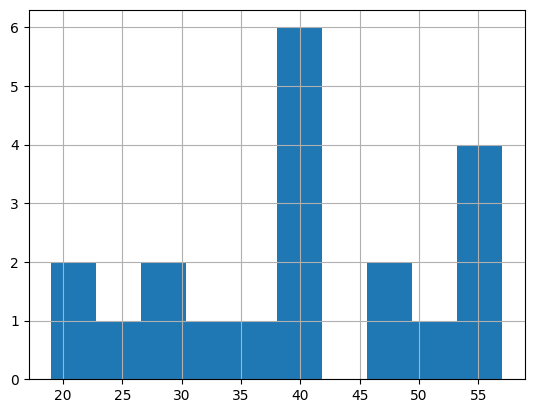

In [10]:
df['Age'].hist(bins=10)

<Axes: >

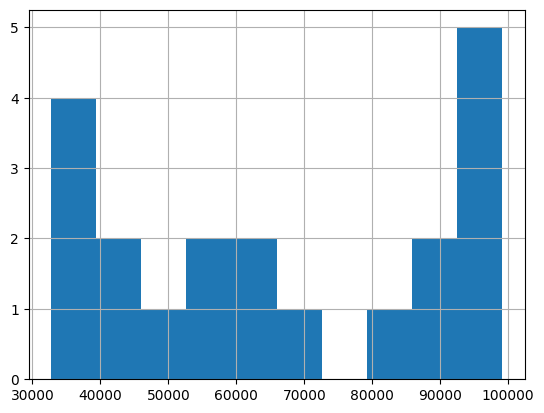

In [11]:
df['Salary'].hist(bins=10)

<Axes: xlabel='Age', ylabel='Salary'>

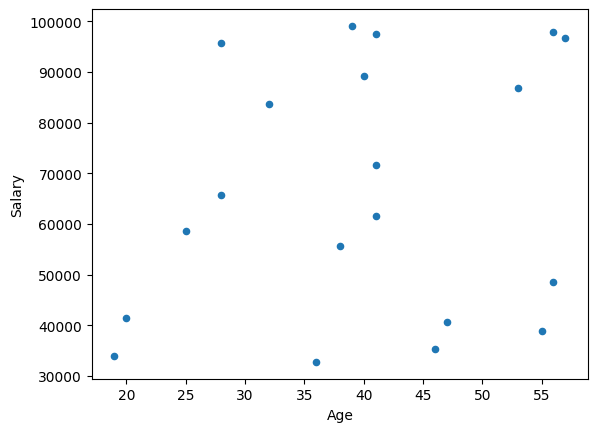

In [12]:
df.plot.scatter(x='Age', y='Salary')

#### Exercise 2


Generate a data set you can use with a supervised ML model.  The data should meet the following criteria:
   - It should have 1000 rows
   - It should have 6 columns, with one column (your "target" column being a boolean column), one categorical column with 5 categories, and 4 numeric columns.
   - The numeric columns should have dramatically different scales - different means, different std. deviations.
   - Each non-target column should have about 5% nulls.

Make this data a little more interesting by calculating the target column using a noisy function of the other columns.

In [13]:
np.random.seed(50)

n = 1000

num1 = np.random.normal(10, 2, n)          
num2 = np.random.normal(1000, 300, n)      
num3 = np.random.normal(50, 15, n)         
num4 = np.random.normal(0, 1, n)          

cat = np.random.choice(['A','B','C','D','E'], n)

for arr in [num1, num2, num3, num4, cat]:
    mask = np.random.rand(n) < 0.05
    arr[mask] = np.nan

target = ( (np.nan_to_num(num1) + np.nan_to_num(num4)) > 10 ).astype(int)
noise = np.random.binomial(1, 0.1, n)   # 10% flip noise
target = np.abs(target - noise)         # flip target with noise

df = pd.DataFrame({
    'num1': num1,
    'num2': num2,
    'num3': num3,
    'num4': num4,
    'category': cat,
    'target': target
})

print(df.head())


        num1         num2       num3      num4 category  target
0   6.879296  1625.082209  46.296405 -0.234820        A       0
1   9.938045  1961.853183  61.278206 -1.295428        D       0
2   8.758143   943.019834  29.098191 -0.408296        E       0
3   7.070839  1159.352177  54.516616  1.314975        D       0
4  12.823892   330.098879  62.281996 -0.027244        D       1


In [7]:
# Your code here


#### Exercise 3

Use whatever resources you need to figure out how to build an SKLearn ML pipelines. Use a pipeline to build an ML approach to predicting your target column in the preceding data with logistic regression.  I have set up the problem below so that you will write your code in a function function call that takes an SKLearn model and data frame and returns the results of a cross validation scoring routine.  

I have not taught you how to do this; use the book, google, the notes, chatgpt, or whatever. This is a test of your ability to *find* information, and use this to construct a solution. Your solution should:

- Use a transformer pipeline that processes your numeric and categorical features separately
- Place everything in a pipeline with the classifier that is passed in to the function.
- I've already implemented the call to cross_val_score - to make it work, you'll need to assign your pipeline to the `pipeline` variable.

_Note: You could just feed this question to AI and get an answer, and chances are, it will be right. But if you do, you won't really learn much. So, be thoughtful in your use of AI here - you can use it to build the solution step by step, and it will explain how everything works. It's all in how you use it. So, it's your choice - go for the easy grade, or learn something._

In [ ]:
# --- Imports
import numpy as np
import pandas as pd

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def run_classifier(df,classifier):
    # Separate features/target
    y = df["target"].astype(int)  # logistic expects numeric; 0/1 from boolean
    X = df.drop(columns=["target"])
    
    numeric_features = ["num1", "num2", "num3", "num4"]
    categorical_features = ["category"]

    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="mean")),
        ("scaler", StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore"))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numeric_transformer, numeric_features),
            ("cat", categorical_transformer, categorical_features)
        ]
    )

    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", classifier)
    ])
    
    return cross_val_score(pipeline, X, y, scoring="f1", cv=5)

scores = run_classifier(df,LogisticRegression(random_state=42))
print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))

F1 (5-fold): mean=0.863, std=0.015
Fold scores: [0.856 0.866 0.84  0.882 0.874]


Try using a `RandomForestClassifier` in the preceding pipeline. Just call `run_classifier` with a `RandomForestClassifier`, and print out the results as above.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

scores_1 = run_classifier(df,RandomForestClassifier(random_state=42))
print(f"F1 (5-fold): mean={scores.mean():.3f}, std={scores.std():.3f}")
print("Fold scores:", np.round(scores, 3))


F1 (5-fold): mean=0.863, std=0.015
Fold scores: [0.856 0.866 0.84  0.882 0.874]


Normally, `RandomForestClassifier`s are considered to be more powerful than `LogisticRegression`.  Depending on your data, this may or may not be the case. Reflect on your answers - which one does better here, and why do you think that is?  Once again, you might use AI, but you should probably also try to _understand_ the answer.

In this dataset both results (RandomForestClassifier and LogisticRegression) are the same, meaning both the classifiers performed equally, none is less powerful or more powerful. 

Generally, the RandomForestClassifier is considered to be more powerful than LogisticRegression, since it can handle the non-linear pattern and interactions. But in our case the data was generated in the linear pattern, hence we couldn't see any difference between the two classifier.